In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [3]:
data_directory = "dataset/train"
subjects = os.listdir(data_directory)

data = []
for subj in subjects:
    preRT_img = os.path.join(data_directory, subj, "preRT", f"{subj}_preRT_T2.nii.gz")
    preRT_mask = os.path.join(data_directory, subj, "preRT", f"{subj}_preRT_mask.nii.gz")
    
    if os.path.exists(preRT_img) and os.path.exists(preRT_mask):
        data.append({"image": preRT_img, "label": preRT_mask})
print(data)

[{'image': 'dataset/train/50/preRT/50_preRT_T2.nii.gz', 'label': 'dataset/train/50/preRT/50_preRT_mask.nii.gz'}, {'image': 'dataset/train/46/preRT/46_preRT_T2.nii.gz', 'label': 'dataset/train/46/preRT/46_preRT_mask.nii.gz'}, {'image': 'dataset/train/75/preRT/75_preRT_T2.nii.gz', 'label': 'dataset/train/75/preRT/75_preRT_mask.nii.gz'}, {'image': 'dataset/train/119/preRT/119_preRT_T2.nii.gz', 'label': 'dataset/train/119/preRT/119_preRT_mask.nii.gz'}, {'image': 'dataset/train/11/preRT/11_preRT_T2.nii.gz', 'label': 'dataset/train/11/preRT/11_preRT_mask.nii.gz'}, {'image': 'dataset/train/195/preRT/195_preRT_T2.nii.gz', 'label': 'dataset/train/195/preRT/195_preRT_mask.nii.gz'}, {'image': 'dataset/train/80/preRT/80_preRT_T2.nii.gz', 'label': 'dataset/train/80/preRT/80_preRT_mask.nii.gz'}, {'image': 'dataset/train/63/preRT/63_preRT_T2.nii.gz', 'label': 'dataset/train/63/preRT/63_preRT_mask.nii.gz'}, {'image': 'dataset/train/188/preRT/188_preRT_T2.nii.gz', 'label': 'dataset/train/188/preRT/188_

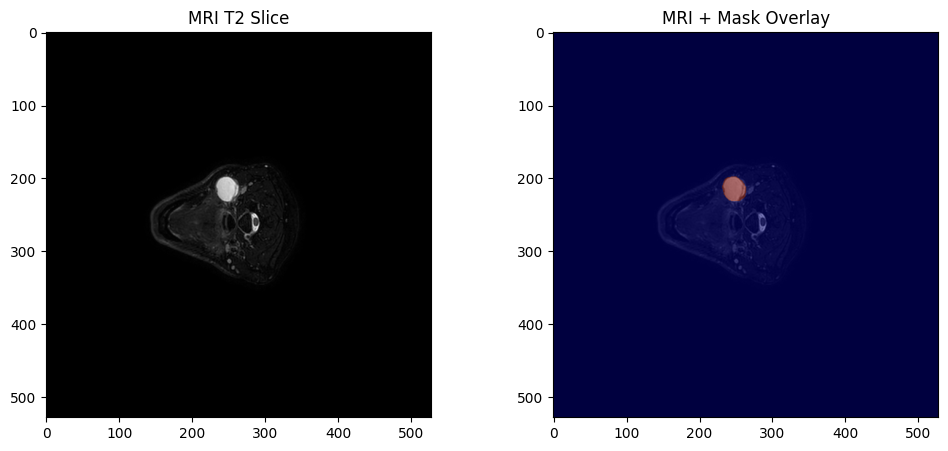

In [ ]:
def plot_sample(sample):
    image = nib.load(sample["image"]).get_fdata()
    label = nib.load(sample["label"]).get_fdata()
    slice_idx = image.shape[2] // 2  # slice centrale
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[:, :, slice_idx], cmap='gray')
    plt.title("MRI T2 Slice")

    plt.subplot(1, 2, 2)
    plt.imshow(image[:, :, slice_idx], cmap='gray')
    plt.imshow(label[:, :, slice_idx], cmap='jet', alpha=0.5)
    plt.title("MRI + Mask Overlay")
    plt.show()

plot_sample(random.choice(data))

In [4]:
unique_labels = set()

for sample in data:
    label = nib.load(sample["label"]).get_fdata()
    unique_values = np.unique(label)
    unique_labels.update(unique_values)

print("Unique values ​​found in labels:", sorted(unique_labels))

Unique values ​​found in labels: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]


In [5]:
image_shapes = []
voxel_counts = []
intensity_ranges = []

for sample in data:
    image = nib.load(sample["image"]).get_fdata()
    label = nib.load(sample["label"]).get_fdata()
    
    image_shapes.append(image.shape)
    voxel_counts.append(np.sum(label > 0))
    intensity_ranges.append((np.min(image), np.max(image)))

print("Number of images:", len(data))
print("Unique shapes:", set(image_shapes))

Number of images: 130
Unique shapes: {(528, 528, 132), (512, 512, 75), (512, 512, 81), (528, 528, 129), (640, 640, 150), (512, 512, 78), (512, 512, 87), (512, 512, 133), (640, 640, 162), (512, 512, 90), (512, 480, 122), (528, 528, 113), (512, 512, 62), (528, 528, 110), (512, 512, 65), (528, 528, 119), (528, 528, 125), (512, 512, 68), (512, 512, 74), (528, 528, 122), (512, 512, 71), (512, 512, 77), (512, 512, 83), (528, 528, 137), (512, 512, 80), (512, 512, 86), (640, 640, 155), (528, 528, 146), (528, 528, 123), (512, 480, 139), (528, 528, 112), (640, 640, 72), (512, 512, 67), (640, 640, 78), (512, 512, 61), (640, 640, 84), (512, 512, 70), (512, 512, 76), (528, 528, 124), (512, 512, 73), (512, 512, 79), (528, 528, 139), (512, 512, 82), (512, 512, 88), (512, 512, 85), (512, 512, 91), (528, 528, 96), (512, 512, 57), (528, 528, 111), (512, 512, 60), (640, 640, 71), (528, 528, 120), (512, 512, 69), (528, 528, 117), (560, 560, 66), (512, 512, 66), (512, 512, 72)}


In [6]:
shapes_array = np.array(image_shapes)
df_shapes = pd.DataFrame(shapes_array, columns=["Depth", "Height", "Width"])

print(df_shapes.describe())

            Depth      Height       Width
count  130.000000  130.000000  130.000000
mean   522.953846  522.461538   84.792308
std     30.929994   31.355465   23.667168
min    512.000000  480.000000   57.000000
25%    512.000000  512.000000   70.000000
50%    512.000000  512.000000   76.000000
75%    512.000000  512.000000   85.750000
max    640.000000  640.000000  162.000000


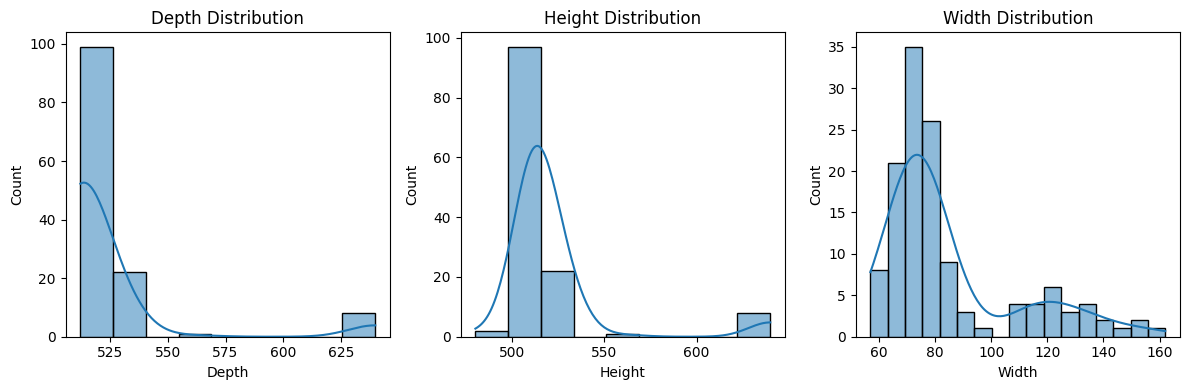

In [7]:
plt.figure(figsize=(12, 4))
for i, dim in enumerate(["Depth", "Height", "Width"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_shapes[dim], kde=True)
    plt.title(f"{dim} Distribution")
plt.tight_layout()
plt.show()

In [8]:
only_label1 = 0
only_label2 = 0
both_labels = 0
no_labels = 0

for sample in data:
    label = nib.load(sample["label"]).get_fdata()
    unique_vals = set(np.unique(label))

    has_label1 = 1 in unique_vals
    has_label2 = 2 in unique_vals

    if has_label1 and has_label2:
        both_labels += 1
    elif has_label1:
        only_label1 += 1
    elif has_label2:
        only_label2 += 1
    else:
        no_labels += 1

print("Only label 1:", only_label1)
print("Only label 2:", only_label2)
print("Both labels:", both_labels)
print("Without any labels:", no_labels)

Only label 1: 18
Only label 2: 14
Both labels: 98
Without any labels: 0


count       130.000000
mean      42991.953846
std       42035.314731
min        2124.000000
25%       18550.500000
50%       33118.000000
75%       54179.000000
max      325542.000000
dtype: float64


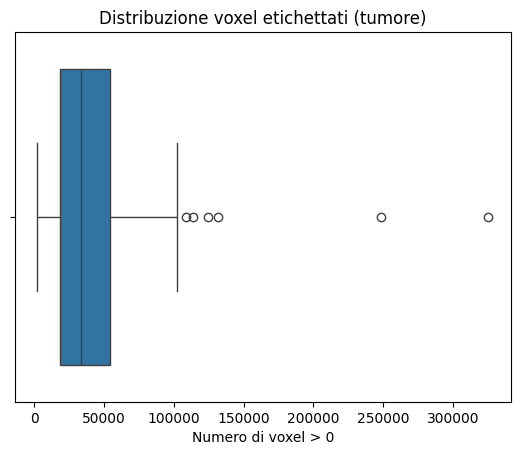

In [9]:
voxel_series = pd.Series(voxel_counts)
print(voxel_series.describe())

# Boxplot per rilevare outlier
sns.boxplot(x=voxel_series)
plt.title("Distribuzione voxel etichettati (tumore)")
plt.xlabel("Numero di voxel > 0")
plt.show()

Media intensità (media globale): 44.70019369787564
Deviazione standard media: 99.27618342822902


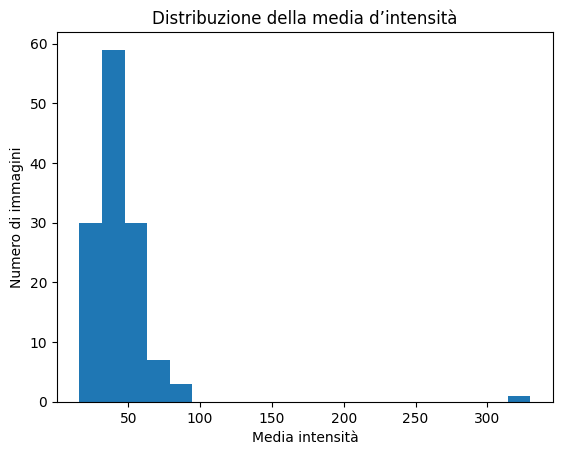

In [10]:
mean_intensities = []
std_intensities = []

for sample in data:
    img = nib.load(sample["image"]).get_fdata()
    mean_intensities.append(np.mean(img))
    std_intensities.append(np.std(img))

# Statistiche globali
print("Media intensità (media globale):", np.mean(mean_intensities))
print("Deviazione standard media:", np.mean(std_intensities))

# Istogramma
plt.hist(mean_intensities, bins=20)
plt.title("Distribuzione della media d’intensità")
plt.xlabel("Media intensità")
plt.ylabel("Numero di immagini")
plt.show()

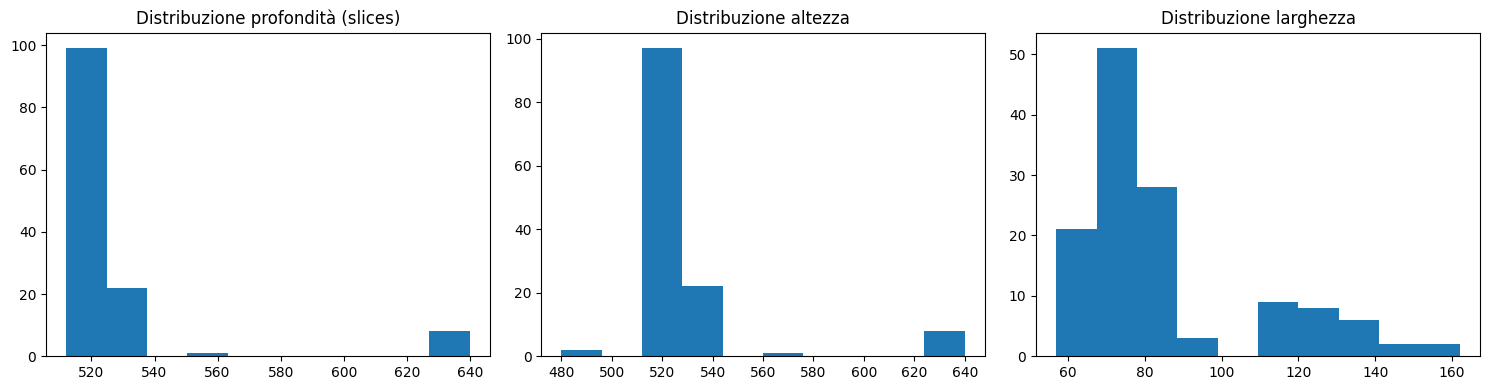

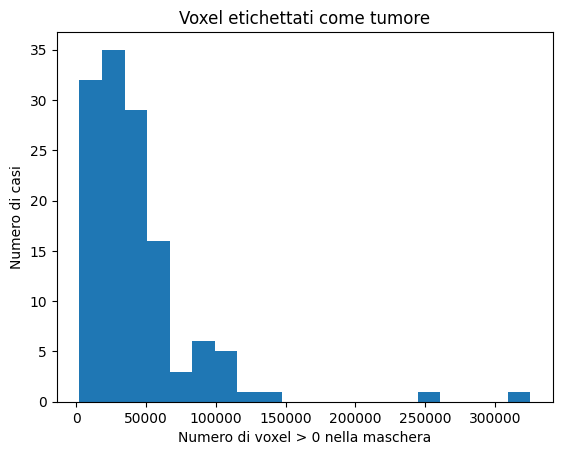

In [11]:
depths, heights, widths = zip(*image_shapes)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(depths, bins=10)
plt.title("Distribuzione profondità (slices)")

plt.subplot(1, 3, 2)
plt.hist(heights, bins=10)
plt.title("Distribuzione altezza")

plt.subplot(1, 3, 3)
plt.hist(widths, bins=10)
plt.title("Distribuzione larghezza")

plt.tight_layout()
plt.show()

# Voxel tumorali
plt.hist(voxel_counts, bins=20)
plt.title("Voxel etichettati come tumore")
plt.xlabel("Numero di voxel > 0 nella maschera")
plt.ylabel("Numero di casi")
plt.show()

In [13]:
image_intensities = []
for sample in data:
    img = nib.load(sample["image"]).get_fdata()
    image_intensities.append(img)

all_intensities = np.concatenate([i.flatten() for i in image_intensities])
min_intensity = np.min(all_intensities)
max_intensity = np.max(all_intensities)

print(f"Min intensity: {min_intensity}, Max intensity: {max_intensity}")

Min intensity: 0.0, Max intensity: 9887.296875


In [15]:
percentile_1 = np.percentile(all_intensities, 1)
percentile_99 = np.percentile(all_intensities, 99)

print(f"Percentile 1: {percentile_1}, Percentile 99: {percentile_99}")

Percentile 1: 0.0, Percentile 99: 626.5592041015625


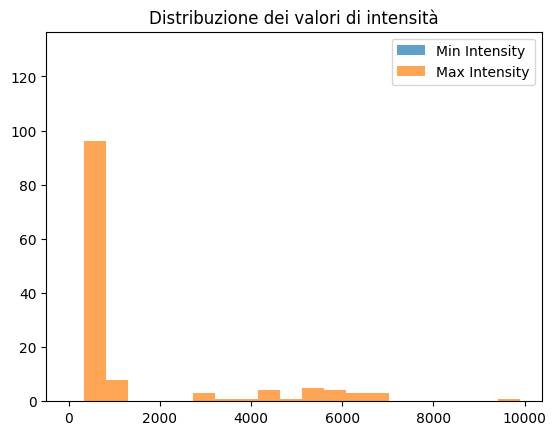

In [14]:
mins, maxs = zip(*intensity_ranges)

plt.hist(mins, bins=20, alpha=0.7, label="Min Intensity")
plt.hist(maxs, bins=20, alpha=0.7, label="Max Intensity")
plt.title("Distribuzione dei valori di intensità")
plt.legend()
plt.show()